# Comparison of classical methods to calculate ground state energy

## Classical methods
- Full Configuration Interaction
 - Tractable in simple basis set
- Hartree Fock
 - Cheap but inaccurate
- Coupled-Cluster Single Double
 - Expensive but accurate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## LiH

- HF loses accuracy in larger $R$
- Asymmetric nature of LiH seems to affect in HF

In [2]:
bond_lengths = np.linspace(0.2,4,20)

In [3]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci', print_log=False)

In [4]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf', print_log=False)

In [5]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd', print_log=False)

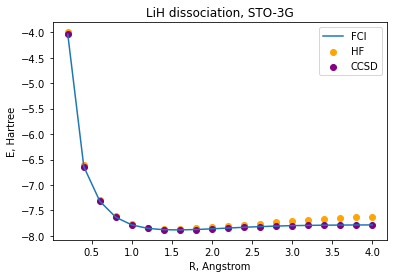

In [6]:
#Plot LiH PESs

plt.title('LiH dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

print()

## H$_4$

- HF is not accurate

In [7]:
angles = np.linspace(85,95,20)

In [8]:
#Run FCI
FCI_PES = obtain_PES('h4',angles, basis, method='fci', print_log=False)

In [9]:
#Run HF
HF_PES = obtain_PES('h4', angles, basis,  method='hf', print_log=False)

In [10]:
#Run CCSD
CCSD_PES = obtain_PES('h4', angles, basis,  method='ccsd', print_log=False)

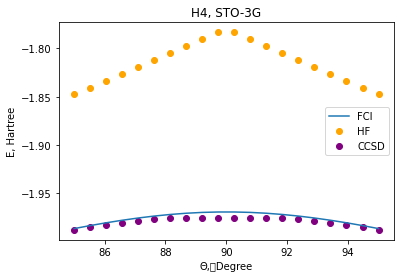

In [11]:
#Plot H2O PESs

plt.title('H4, STO-3G')
plt.xlabel('Θ,　Degree')
plt.ylabel('E, Hartree')

plt.plot(angles, FCI_PES, label='FCI')
plt.scatter(angles, HF_PES, label='HF', color='orange')
plt.scatter(angles, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## NH$_3$
- HF loses accuracy in larger $R$

In [12]:
bond_lengths = np.linspace(0.2,2,20)

In [13]:
#Run FCI
FCI_PES = obtain_PES('nh3', bond_lengths, basis, method='fci', print_log=False)

In [14]:
#Run HF
HF_PES = obtain_PES('nh3', bond_lengths, basis,  method='hf', print_log=False)

In [15]:
#Run CCSD
CCSD_PES = obtain_PES('nh3', bond_lengths, basis,  method='ccsd', print_log=False)

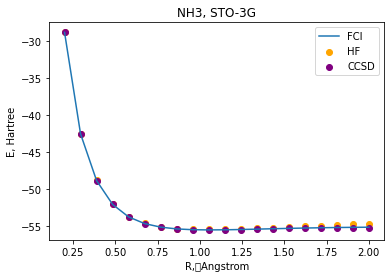

In [17]:
#Plot NH3 PESs

plt.title('NH3, STO-3G')
plt.xlabel('R,　Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

print()

## N$_2$
- HF loses accuracy in larger $R$ but not so obvious

In [18]:
bond_lengths = np.linspace(0.2,1.8,20)

In [19]:
#Run FCI
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci', print_log=False)

In [20]:
#Run HF
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf', print_log=False)

In [21]:
#Run CCSD
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd', print_log=False)

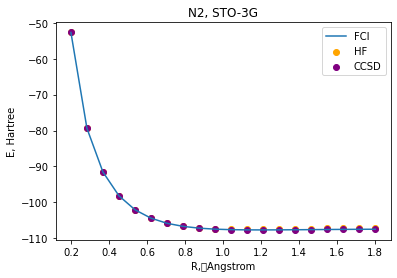

In [22]:
#Plot NH3 PESs

plt.title('N2, STO-3G')
plt.xlabel('R,　Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()
print()